<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Forecasting_conti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA


In [5]:
data = pd.read_csv('/content/water.csv',header=0,index_col=0,parse_dates=True,squeeze=False)

In [6]:
data

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


In [7]:
split_point = len(data)-10

In [8]:
from re import split
dataset,validation = data[0:split_point], data[split_point:]

In [9]:
dataset.to_csv('dataset',header=False)
validation.to_csv('validation',header=False)

In [10]:
train = pd.read_csv('/content/dataset',header=0,index_col=0,parse_dates=True)

In [11]:
X = train.values

In [12]:
X = X.astype('float32')

In [13]:
model = ARIMA(X, order = (4,1,0))
model_fit = model.fit()

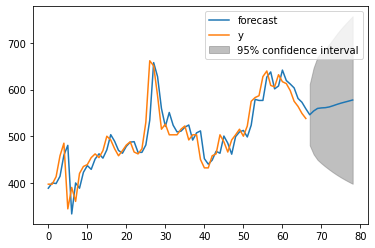

In [14]:
forecast = model_fit.forecast(steps=10)[0]
pred = model_fit.plot_predict(1,79)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
val = pd.read_csv('/content/validation',header=None)
rmse = np.sqrt(mean_squared_error(val[1],forecast))

In [17]:
rmse

31.5023843588514

In [18]:
model_data = pd.read_csv('/content/water.csv', header = 0, index_col=0, parse_dates=True)

In [19]:
model = ARIMA(model_data.values, order = (4,1,0))

In [20]:
fit = model.fit()

In [21]:
fore = fit.forecast(steps=10)[0]

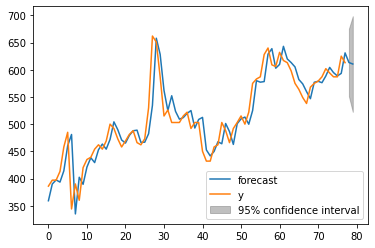

In [22]:
gra = fit.plot_predict(1,80)

In [23]:
fore

array([613.32306842, 610.5295359 , 616.34695448, 621.11573446,
       625.32308169, 627.84220712, 630.42462344, 633.33747825,
       636.62725995, 639.91220595])